In [1]:
# Import libraries/packages
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

# Adjust the configuration of created plots
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# Read in the data
df = pd.read_csv(r'C:\Users\msgib\Downloads\adm_data.csv')

In [2]:
# Observe the first few rows of the data
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
# Observe if there is missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

Serial No. - 0.0%
GRE Score - 0.0%
TOEFL Score - 0.0%
University Rating - 0.0%
SOP - 0.0%
LOR  - 0.0%
CGPA - 0.0%
Research - 0.0%
Chance of Admit  - 0.0%


In [4]:
# Check each column's data type
df.dtypes

Serial No.             int64
GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research               int64
Chance of Admit      float64
dtype: object

In [5]:
# Change display options
pd.set_option('display.max_rows', None)

In [6]:
# Change column name
df.rename(columns = {'Chance of Admit ':'Chance of Admit'}, 
                     inplace = True)

In [7]:
# Drop the Serial No. Column
df.drop(columns=['Serial No.'], inplace = True)

In [8]:
# Sort the table by admission chances
df = df.sort_values(by=['Chance of Admit'], inplace=False,ascending=False)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
143,340,120,4,4.5,4.0,9.92,1,0.97
24,336,119,5,4.0,3.5,9.80,1,0.97
202,340,120,5,4.5,4.5,9.91,1,0.97
203,334,120,5,4.0,5.0,9.87,1,0.97
71,336,112,5,5.0,5.0,9.76,1,0.96


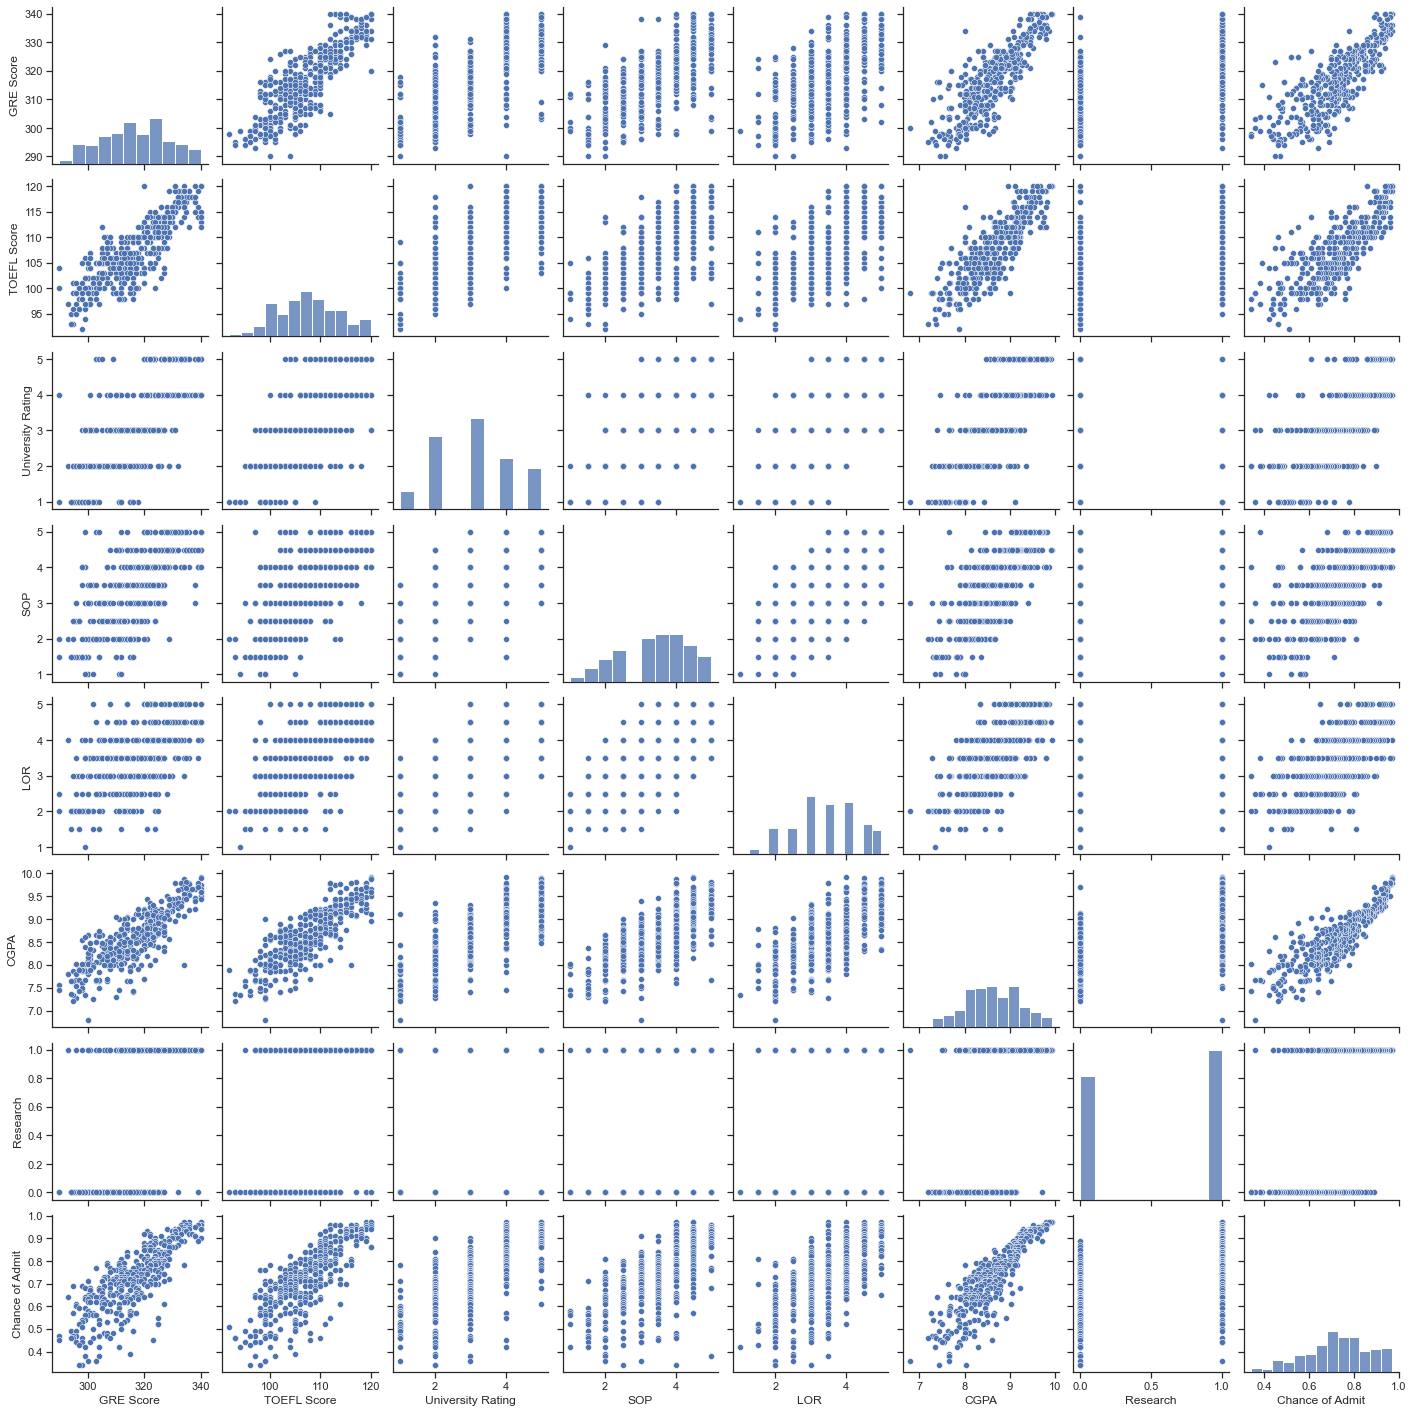

In [9]:
# Observe scatterplot matrix for data
sns.set_theme(style="ticks")
sns.pairplot(df)

In [10]:
# Observe correlation matrix
df.corr(method = 'pearson').round(3)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000,0.836,0.669,0.613,0.558,0.833,0.580,0.803
TOEFL Score,0.836,1.000,0.696,0.658,0.568,0.828,0.490,0.792
University Rating,0.669,0.696,1.000,0.735,0.660,0.746,0.448,0.711
SOP,0.613,0.658,0.735,1.000,0.730,0.718,0.444,0.676
LOR,0.558,0.568,0.660,0.730,1.000,0.670,0.397,0.670
CGPA,0.833,0.828,0.746,0.718,0.670,1.000,0.522,0.873
Research,0.580,0.490,0.448,0.444,0.397,0.522,1.000,0.553
Chance of Admit,0.803,0.792,0.711,0.676,0.670,0.873,0.553,1.000


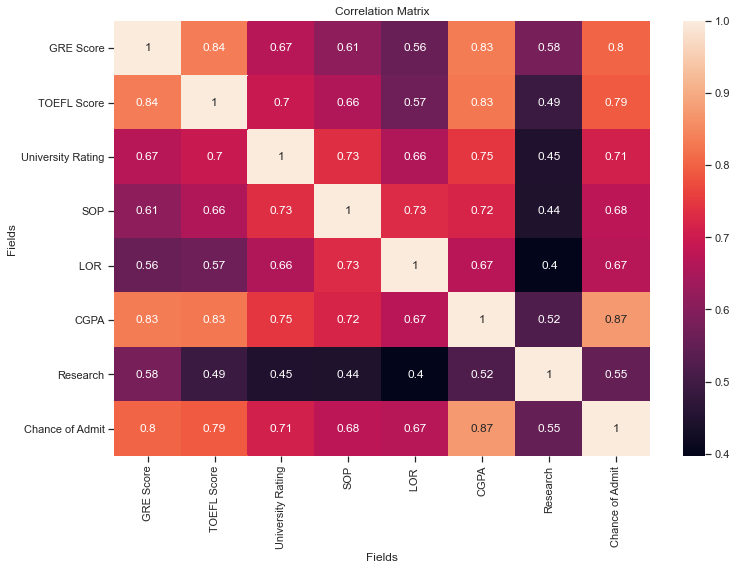

In [11]:
# Observe heatmap of correlation matrix
correlation_matrix = df.corr(method = 'pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.xlabel('Fields')
plt.ylabel('Fields')
plt.show()

In [12]:
# Observe the correlation in an alternate format
corr_pairs = correlation_matrix.unstack()
sorted_corr_pairs = corr_pairs.sort_values()
sorted_corr_pairs

LOR                Research             0.396859
Research           LOR                  0.396859
SOP                Research             0.444029
Research           SOP                  0.444029
University Rating  Research             0.447783
Research           University Rating    0.447783
                   TOEFL Score          0.489858
TOEFL Score        Research             0.489858
Research           CGPA                 0.521654
CGPA               Research             0.521654
Research           Chance of Admit      0.553202
Chance of Admit    Research             0.553202
LOR                GRE Score            0.557555
GRE Score          LOR                  0.557555
LOR                TOEFL Score          0.567721
TOEFL Score        LOR                  0.567721
GRE Score          Research             0.580391
Research           GRE Score            0.580391
SOP                GRE Score            0.612831
GRE Score          SOP                  0.612831
TOEFL Score        S

In [13]:
# Observe which variables have an extremely high correlation (> 0.75)
high_corr = sorted_corr_pairs[abs(sorted_corr_pairs) > 0.75]
high_corr

TOEFL Score        Chance of Admit      0.791594
Chance of Admit    TOEFL Score          0.791594
                   GRE Score            0.802610
GRE Score          Chance of Admit      0.802610
CGPA               TOEFL Score          0.828417
TOEFL Score        CGPA                 0.828417
CGPA               GRE Score            0.833060
GRE Score          CGPA                 0.833060
TOEFL Score        GRE Score            0.835977
GRE Score          TOEFL Score          0.835977
CGPA               Chance of Admit      0.873289
Chance of Admit    CGPA                 0.873289
GRE Score          GRE Score            1.000000
CGPA               CGPA                 1.000000
LOR                LOR                  1.000000
SOP                SOP                  1.000000
University Rating  University Rating    1.000000
TOEFL Score        TOEFL Score          1.000000
Research           Research             1.000000
Chance of Admit    Chance of Admit      1.000000
dtype: float64